# Features analysis

In this script, we visually analyze the collected features

To run this script, the following datafiles are needed:
- dt_final.xlsx (attached)

In [1]:
# data
import pandas as pd
import numpy as np
import csv

# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
import seaborn as sn


# from newsplease import NewsPlease

# nlp
# from nltk.tokenize import sent_tokenize, word_tokenize
# import nltk
# nltk.download('punkt')
# nltk.download('sentiwordnet')
# nltk.download('wordnet')
# from nltk.corpus import sentiwordnet as swn
# import stanza
# #stanza.download('en') # download English model
# #nlp = stanza.Pipeline('en') # initialize English neural pipeline optional : processors='tokenize, pos'
# import spacy
# nlp_spacy_core_web_sm = spacy.load("en_core_web_sm")
# nlp_spacy_core_web_lg = spacy.load("en_core_web_lg")
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import OneHotEncoder

# statistics
# import statistics
# import statsmodels
# from statsmodels.stats import inter_rater
# import krippendorff
# from scipy import spatial

In [2]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
feats = pd.read_excel("dt_final.xlsx")

In [3]:
list(feats)

['Unnamed: 0',
 'sentence',
 'outlet',
 'topic',
 'type',
 'num_sent',
 'article',
 'biased_words3',
 'biased_words4',
 'biased_words5',
 'text',
 'text_low',
 'pos',
 'lemma',
 'lemma_low',
 'tag',
 'dep',
 'is_stop',
 'glove_vec300_norm',
 'order',
 'tfidf_art',
 'label3',
 'label4',
 'label5',
 'is_ne',
 'ne_label',
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'MRCP_concretness_ratings',
 'MRCP_Imagability_ratings',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk '

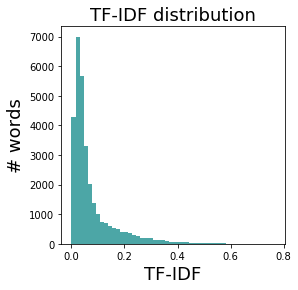

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

n, bins, patches = plt.hist(feats['tfidf_art'], 50, density=False, facecolor='teal', alpha=0.7)

plt.xlabel('TF-IDF', fontsize=18)
plt.ylabel('# words', fontsize=18)
plt.title('TF-IDF distribution', fontsize=18)

plt.show()

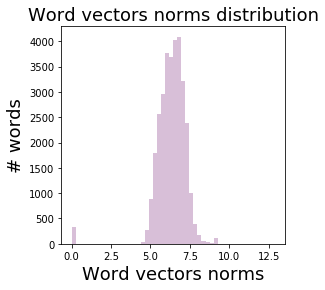

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

n, bins, patches = plt.hist(feats['glove_vec300_norm'], 50, density=False, facecolor='thistle')

plt.xlabel('Word vectors norms', fontsize=18)
plt.ylabel('# words', fontsize=18)
plt.title('Word vectors norms distribution', fontsize=18)

plt.show()

/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


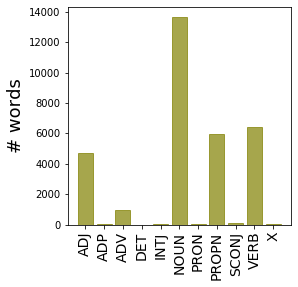

In [13]:
feats_gr_pos = feats.groupby(['pos'])[['sentence']].count()
feats_gr_pos = feats_gr_pos.reset_index()
feats_gr_pos = feats_gr_pos.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(4,4))

xticklabels = feats_gr_pos.pos

ax.bar(np.arange(len(feats_gr_pos.pos)), feats_gr_pos.num,
        align='center', color='olive', edgecolor='olive', alpha=0.7)
ax.set_xticks(np.arange(len(feats_gr_pos.pos)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('POS tags', fontsize=18)
ax.set_ylabel('# words', fontsize=18)

fig.show()

/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


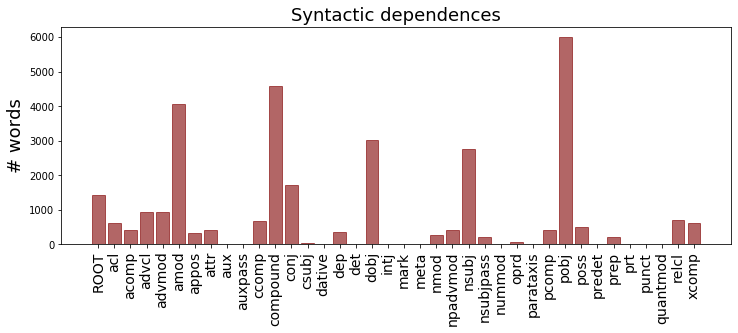

In [16]:
feats_gr_dep = feats.groupby(['dep'])[['sentence']].count()
feats_gr_dep = feats_gr_dep.reset_index()
feats_gr_dep = feats_gr_dep.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(12,4))

xticklabels = feats_gr_dep.dep

ax.bar(np.arange(len(feats_gr_dep.dep)), feats_gr_dep.num,
        align='center', color='maroon', edgecolor='maroon', alpha=0.6)
ax.set_xticks(np.arange(len(feats_gr_dep.dep)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
ax.set_title('Syntactic dependences', fontsize=18)
ax.set_ylabel('# words', fontsize=18)

fig.show()

/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


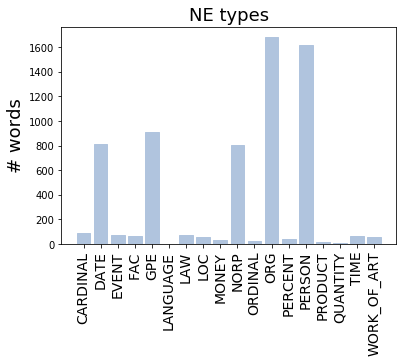

In [20]:
feats['ne_label']

feats_gr_ner = feats.groupby(['ne_label'])[['sentence']].count()
feats_gr_ner = feats_gr_ner.reset_index()
feats_gr_ner = feats_gr_ner.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(6,4))

xticklabels = feats_gr_ner.ne_label

ax.bar(np.arange(len(feats_gr_ner.ne_label)), feats_gr_ner.num,
        align='center', color='lightsteelblue', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feats_gr_ner.ne_label)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
ax.set_title('NE types', fontsize=18)
ax.set_ylabel('# words', fontsize=18)

fig.show()

In [21]:
feats_liwc = feats[['affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ']]

/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


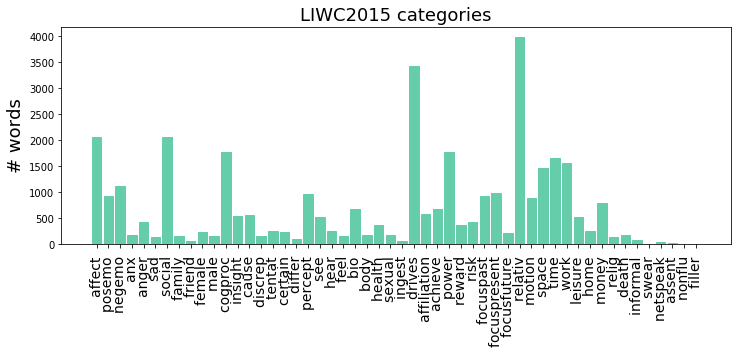

In [23]:
feats_gr_liwc = pd.DataFrame(feats_liwc.sum(axis=0))
feats_gr_liwc = feats_gr_liwc.reset_index()
feats_gr_liwc = feats_gr_liwc.rename(columns={"index":"category", 0:"num"})


fig, ax = plt.subplots(1, 1, figsize=(12,4))

xticklabels = feats_gr_liwc.category

ax.bar(np.arange(len(feats_gr_liwc.category)), feats_gr_liwc.num,
        align='center', color='mediumaquamarine', edgecolor='mediumaquamarine')
ax.set_xticks(np.arange(len(feats_gr_liwc.category)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
ax.set_title('LIWC2015 categories', fontsize=18)
ax.set_ylabel('# words', fontsize=18)

fig.show()

In [24]:
feats_rest = feats[['negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters']]

/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


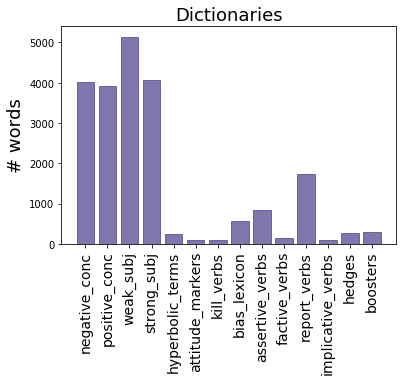

In [26]:
feats_gr_rest = pd.DataFrame(feats_rest.sum(axis=0))
feats_gr_rest = feats_gr_rest.reset_index()
feats_gr_rest = feats_gr_rest.rename(columns={"index":"feature", 0:"num"})


fig, ax = plt.subplots(1, 1, figsize=(6,4))

xticklabels = feats_gr_rest.feature

ax.bar(np.arange(len(feats_gr_rest.feature)), feats_gr_rest.num,
        align='center', color='darkslateblue', edgecolor='darkslateblue', alpha=0.7)
ax.set_xticks(np.arange(len(feats_gr_rest.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
ax.set_title('Dictionaries', fontsize=18)
ax.set_ylabel('# words', fontsize=18)

fig.show()

In [27]:
feats_cor = feats[['label4',
 'glove_vec300_norm',
 'tfidf_art',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',            
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ']]

In [28]:
corrMatrix = feats_cor.corr()
corrMatrix = corrMatrix.dropna(axis=1, how='all')
corrMatrix = corrMatrix.dropna(axis=0, how='all')

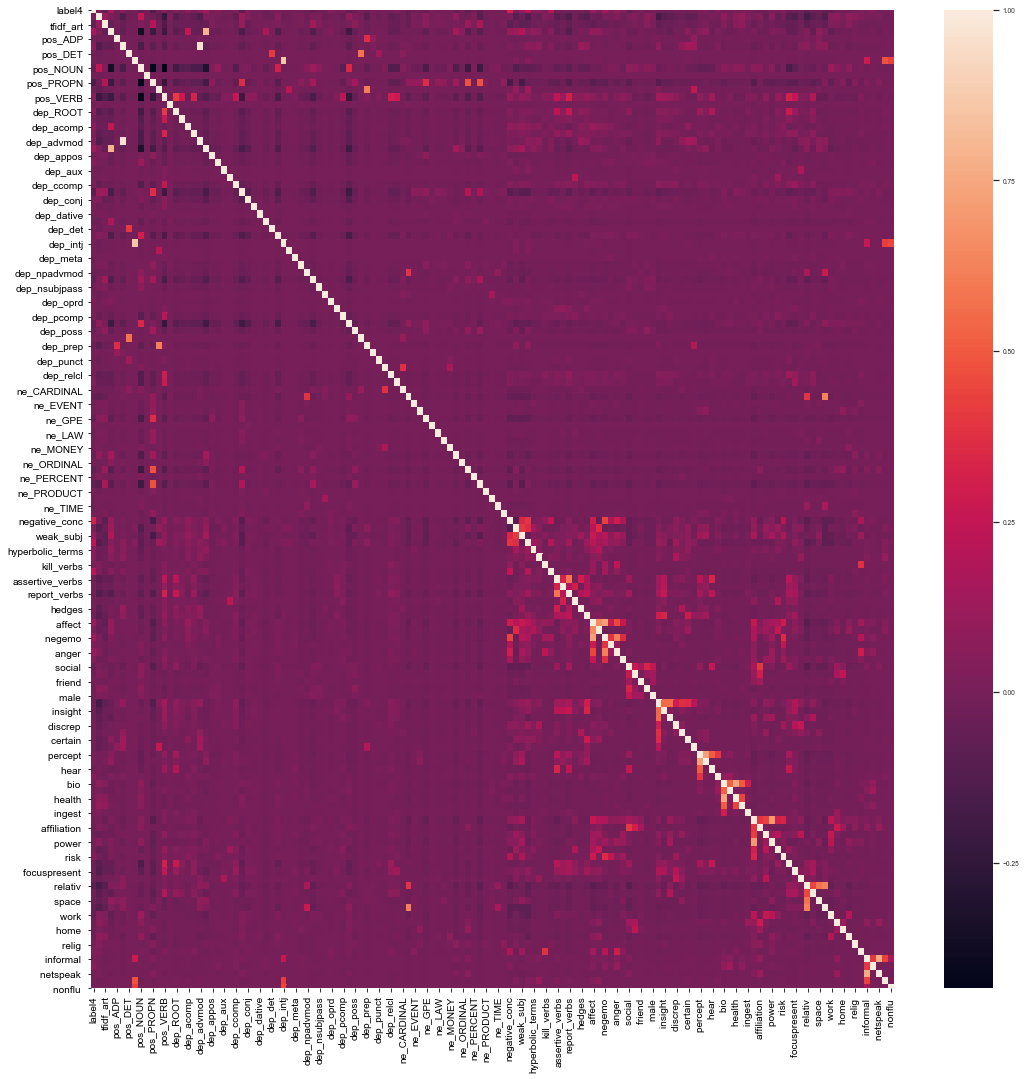

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(18,18))
sn.set(font_scale=0.6)
sn.heatmap(corrMatrix, annot=False)
plt.show()